# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

%matplotlib inline

Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston['feature_names'])
y = pd.DataFrame(boston.target, columns=['price'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

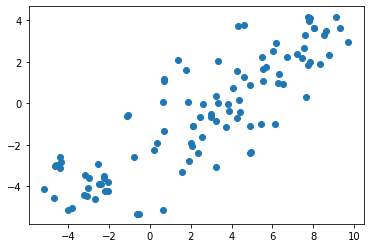

In [4]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

###### Мой вывод:  
Лично я не понял, каковы данные были получены в X_train_tsne и как их можно применять для анализа.

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

label_scales = model.fit_predict(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

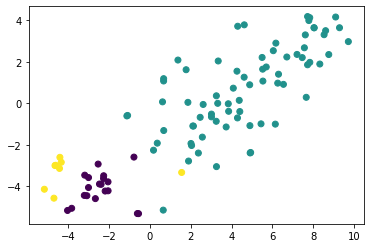

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=label_scales)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
print('Среднее значение цены:',format(y_train.mean()["price"]))
print('Кластер 0: {}'.format(X_train.loc[label_scales == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[label_scales == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[label_scales == 2, 'CRIM'].mean()))

Среднее значение цены: 22.642574257425743
Кластер 0: 8.275661052631579
Кластер 1: 0.36992783783783784
Кластер 2: 14.057258749999999


###### Мой вывод:  
Повторяя увиденное в методичке, а также просмотрев видео, не понял тему урока.  
Рассчитываю осознать проделанное при помощи kaggle, а также на вебинаре.

# Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [10]:
label_scales_for_test = model.fit_predict(X_test)

print('Среднее значение цены:',format(y_test.mean()["price"]))
print('Кластер 0: {}'.format(X_test.loc[label_scales_for_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[label_scales_for_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[label_scales_for_test == 2, 'CRIM'].mean()))

Среднее значение цены: 22.50543209876543
Кластер 0: 0.3762762328767123
Кластер 1: 11.513669759036143
Кластер 2: 15.528846


###### Мой вывод:  
Не понял чем задание 3 отличается от 2 и почему оно со звездочкой.